# Assignment 3
## JuPyter Notebook - Verschuur L. 1811053, Kolenbrander M. 1653415

Assignment 3 of Advances in Datamining has two main tasks:
- Master classification algorithms
- Master visualisation and dimensionality reduction algorithms

Our submission consists of two notebooks and a python import file:
- `"AIDM Assignment 3 - Visualization.ipynb"`
- `"AIDM Assignment 3 - Classification.ipynb"`
- `"utility_functions.py"`

This file, `"AIDM Assignment 3 - Visualization.ipynb"`, focusses on the visualisation aspect of the assignment. In the visualisation aspect, the assignment requires the visualisation of a multidimensional (large) dataset into an easier to read representation. In the case of this assignment, the representations are as follows:
- a `PCA` *(Principal component analysis)* graph
- a `LLE` *(Principal component analysis)* graph
- a `t-SNE` *(T-distributed Stochastic Neighbor Embedding)* graph

All three visualisation implementation are implemented using the [SKLearn libraries](https://scikit-learn.org/stable/).

For this assignment, the [*Rain in Australia*](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) dataset is used. For more detail, please see the **Data fetching & Data pre-processing** heading. All data is first processed in a Pandas dataframe structure.

In [1]:
from utility_functions import *

## Parameters

# Convert numeric values into ranged representations
convert_to_range = True
# Represent ranges as categorical values or rounded to nearest base value: 12, b=5 -> 10-14
range_categorical = False
# Convert categorical values (not from ranged values) into one hot representations:
# {'smoking': ['sometimes', 'regularly', 'sometimes', 'never']} -> 
# {'smoking_sometimes': [1, 0, 1, 0], 'smoking_regularly': [0, 1, 0, 0], 'smoking_never': [0, 0, 0, 1]}
convert_categorical_to_one_hot = True

## Data fetching & Data pre-processing

The [*Rain in Australia*](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) dataset, is a historical dataset used for classification of rain prediction. The dataset contains `145460` data-entries spread across `21` dimensions, or rather columns/attributes. The data is gathered from around Australia and runs from `2007` up and until `2017`.

The data is build up of the following attributes:
- **Date** (format yyyy-mm-dd) \[data_type: string\] -> requires converting to \[data_type: datetime64\]
- **Location** \[data_type: string\] (categorical) -> requires converting to One Hot representation
- **MinTemp** \[data_type: float64\]
- **MaxTemp** \[data_type: float64\]
- **Rainfall** \[data_type: float64\]
- **Evaporation** \[data_type: float64\]
- **WindGustDir** \[data_type: string\] (categorical) -> requires converting to One Hot representation
- **WindDir9am** \[data_type: string\] (categorical) -> requires converting to One Hot representation
- **WindDir3pm** \[data_type: string\] (categorical) -> requires converting to One Hot representation
- **WindGustSpeed** \[data_type: float64\]
- **WindSpeed9am** \[data_type: float64\]
- **WindSpeed3pm** \[data_type: float64\]
- **Humidity9am** \[data_type: float64\]
- **Humidity3pm** \[data_type: float64\]
- **Pressure9am** \[data_type: float64\]
- **Pressure3pm** \[data_type: float64\]
- **Cloud9am** \[data_type: int64\] (categorical)
- **Cloud3pm** \[data_type: int64\] (categorical)
- **Temp9am** \[data_type: float64\]
- **Temp3pm** \[data_type: float64\]
- **RainToday** \[data_type: string\] (binary category) -> requires converting to \[data_type: bool\]
- **RainTomorrow** *TARGET* \[data_type: string\] (binary category) -> requires converting to \[data_type: bool\]

### Data preparation
All float values are reduced in their resolution by applying a *nearest range* to them. 

**Example:**

With a range of `range=5`
The following array:

`[12, 18, 21, 24, 25]`

Would be converted to:

`[10, 20, 20, 25, 25]`


Because of limitation in the used libraries, all categorical (string) attributes are converted into a *one-hot* representation.

In this implementation, the choice is made to drop entries with missing data.


### Basic attribute selection
For all attributes with multiple measurepoints, only the latest point (the 3pm attributes) are used. These are closest to the target event (RainTomorrow).

Categorical variables (even in one-hot representation) are left out of the visualisation.

Lastely, data with a lot of entropy, such as the exact dates, and the id of an entry, are left out. The date is however disected into months, to allow for possible seasonality detection.

In [50]:
import pandas as pd
import numpy as np

file_path = "weatherAUS.csv"

# Fetching CSV and converting to data frame
data_file = pd.read_csv(file_path, header=0)

# Drop all entries with nan values
data_file = data_file.dropna().reset_index(drop=True)

# Convert interval and ratio variables into ranges
if convert_to_range:
    if range_categorical:
        r_func = floor_range
    else:
        r_func = round_to_base
    
    data_file.insert(data_file.columns.get_loc("MinTemp"), "ranged_MinTemp", [r_func(MinTemp, 2) for MinTemp in data_file["MinTemp"]])
    data_file.insert(data_file.columns.get_loc("MaxTemp"), "ranged_MaxTemp", [r_func(MaxTemp, 2) for MaxTemp in data_file["MaxTemp"]])
    data_file.insert(data_file.columns.get_loc("Rainfall"), "ranged_Rainfall", [r_func(Rainfall, 2) for Rainfall in data_file["Rainfall"]])
    data_file.insert(data_file.columns.get_loc("Evaporation"), "ranged_Evaporation", [r_func(Evaporation, 5) for Evaporation in data_file["Evaporation"]])
    data_file.insert(data_file.columns.get_loc("Sunshine"), "ranged_Sunshine", [r_func(Sunshine, 1) for Sunshine in data_file["Sunshine"]])
    data_file.insert(data_file.columns.get_loc("WindGustSpeed"), "ranged_WindGustSpeed", [r_func(WindGustSpeed, 5) for WindGustSpeed in data_file["WindGustSpeed"]])
    data_file.insert(data_file.columns.get_loc("WindSpeed9am"), "ranged_WindSpeed9am", [r_func(WindSpeed9am, 5) for WindSpeed9am in data_file["WindSpeed9am"]])
    data_file.insert(data_file.columns.get_loc("WindSpeed3pm"), "ranged_WindSpeed3pm", [r_func(WindSpeed3pm, 5) for WindSpeed3pm in data_file["WindSpeed3pm"]])
    data_file.insert(data_file.columns.get_loc("Humidity9am"), "ranged_Humidity9am", [r_func(Humidity9am, 5) for Humidity9am in data_file["Humidity9am"]])
    data_file.insert(data_file.columns.get_loc("Humidity3pm"), "ranged_Humidity3pm", [r_func(Humidity3pm, 5) for Humidity3pm in data_file["Humidity3pm"]])
    data_file.insert(data_file.columns.get_loc("Pressure9am"), "ranged_Pressure9am", [r_func(Pressure9am, 3) for Pressure9am in data_file["Pressure9am"]])
    data_file.insert(data_file.columns.get_loc("Pressure3pm"), "ranged_Pressure3pm", [r_func(Pressure3pm, 3) for Pressure3pm in data_file["Pressure3pm"]])
    data_file.insert(data_file.columns.get_loc("Cloud9am"), "ranged_Cloud9am", [r_func(Cloud9am, 3) for Cloud9am in data_file["Cloud9am"]])
    data_file.insert(data_file.columns.get_loc("Cloud3pm"), "ranged_Cloud3pm", [r_func(Cloud3pm, 3) for Cloud3pm in data_file["Cloud3pm"]])
    data_file.insert(data_file.columns.get_loc("Temp9am"), "ranged_Temp9am", [r_func(Temp9am, 3) for Temp9am in data_file["Temp9am"]])
    data_file.insert(data_file.columns.get_loc("Temp3pm"), "ranged_Temp3pm", [r_func(Temp3pm, 3) for Temp3pm in data_file["Temp3pm"]])

    
# Convert "boolean" variables into true boolean variables
data_file["RainToday"] = np.where(data_file["RainToday"] == "Yes", True, False).astype("bool")
data_file["RainTomorrow"] = np.where(data_file["RainTomorrow"] == "Yes", True, False).astype("bool")
data_file["Date"] = data_file["Date"].astype("datetime64")
data_file.insert(data_file.columns.get_loc("Date"), "Month", pd.DatetimeIndex(data_file["Date"]).month)
    
# Convert categorical variables into a one-hot representation
if convert_categorical_to_one_hot:
    data_file = pd.concat([data_file, pd.get_dummies(data_file["WindGustDir"], prefix="WindGustDir")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["WindDir9am"], prefix="WindDir9am")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["WindDir3pm"], prefix="WindDir3pm")], axis=1)
    data_file = pd.concat([data_file, pd.get_dummies(data_file["Location"], prefix="Location")], axis=1)
    
data_file

145460


,Month,Date,Location,ranged_MinTemp,MinTemp,ranged_MaxTemp,MaxTemp,ranged_Rainfall,Rainfall,ranged_Evaporation,...,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera
0,1,2009-01-01,Cobar,18,17.9,36,35.2,0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
1,1,2009-01-02,Cobar,18,18.4,28,28.9,0,0.0,15,...,0,0,0,0,0,0,0,0,0,0
2,1,2009-01-04,Cobar,20,19.4,38,37.6,0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
3,1,2009-01-05,Cobar,22,21.9,38,38.4,0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
4,1,2009-01-06,Cobar,24,24.2,40,41.0,0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,2017-06-20,Darwin,20,19.3,34,33.4,0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
56416,6,2017-06-21,Darwin,22,21.2,32,32.6,0,0.0,10,...,0,0,0,0,0,0,0,0,0,0
56417,6,2017-06-22,Darwin,20,20.7,32,32.8,0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
56418,6,2017-06-23,Darwin,20,19.5,32,31.8,0,0.0,5,...,0,0,0,0,0,0,0,0,0,0


## Visualization

### Preparing the data
**Applied algorithms on this dataset**
- SKLearn Principal component analysis
- SKLearn Locally Linear Embedding
- SKLearn T-distributed Stochastic Neighbor Embedding

Due to the size of the data, and the speed limitation (Especially for LLE and t-SNE), not all data is used for visualisations by default. Only a fraction sample of `0.25` is used. In order to change the sample fraction, please change the `sample_size` variable in the code block below.

The sampling is done uniformly across all data.

In [51]:
from sklearn.preprocessing import StandardScaler

# Random selection of elements
sample_size = 0.25
row_sample = random_selection(int(len(data_file.index) * sample_size), 0, len(data_file.index))

target_attributes = ["RainTomorrow", "RainToday", "Month", "ranged_Rainfall", "ranged_Evaporation", "ranged_Sunshine", "ranged_WindSpeed3pm", "ranged_Humidity3pm", "ranged_Pressure3pm", "ranged_Cloud3pm", "ranged_Temp3pm"]

# Decision Variables
x = data_file.iloc[row_sample][target_attributes].values

x = StandardScaler().fit_transform(x)

y = data_file.iloc[row_sample][target_attributes].reset_index(drop=True)

### Creation of PCA components

In [52]:
from sklearn.decomposition import PCA

PCA_construct = PCA(n_components=2)
pca_data = PCA_construct.fit_transform(x)

# Decision Variables
pca_data_df = pd.DataFrame(data=pca_data, columns=['principal component 1', 'principal component 2'])
# Target Variable
target_data_df = pd.DataFrame(data=y)

#Concatenated dataframe for use
pca_final_df = pd.concat([pca_data_df, target_data_df], axis=1)

#### Visualize the PCA data

C:\Users\Marcel\iCloudDrive\Universiteit\ICT-B\Advances in Datamining\Assignment 3\utility_functions.py:100: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


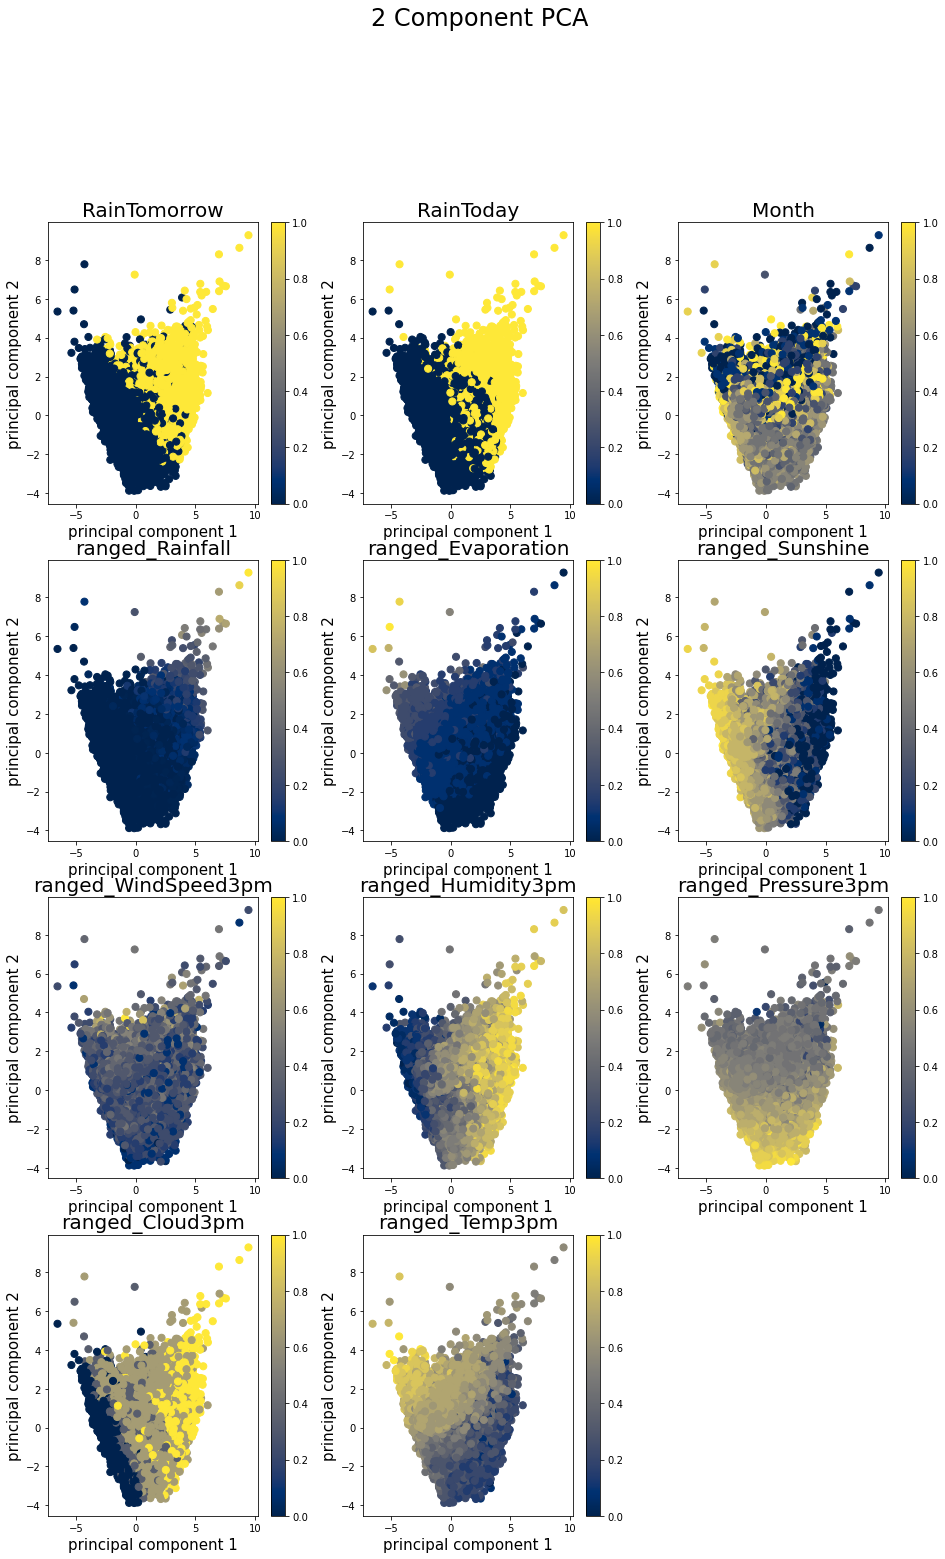

In [53]:
plot_result(pca_final_df, "principal component 1", "principal component 2", target_attributes, "2 Component PCA", size_y=30)

#### Discussion and observation PCA data
There are several observations which can be made based on the graphs above.

First off all, the data seems to have seasonality to it. When looking at the **month** attribute, and comparing it to for example **ranged_Temp3pm** and **ranged_Pressure3pm**, a gradient can be discovered across **principal component 2**. These attributes also seem to be overlap directly or in an inverted fashion.

The most important findings, are overlapping attributes, be it with a direct or an inverted overlap. When noting the target attribute of this dataset **RainTomorrow**, with its largest effect across **principal component 2**, several attributes seem to overlap directly or inverted:
- **RainToday** (direct)
- **Ranged_Rainfall** (direct)
- **Ranged_Evaporation** (inverted)
- **Ranged_Sunshine** (inverted)
- **Ranged_Humidity3pm** (direct)
- **Ranged_Cloud3pm** (direct)

**Ranged_Temp3pm** seems to show a weak (inverted) overlapped with **RainTomorrow**.

The attributes above might, because of their similar or inverted grouping, have (strong) influences on one and another, and especially on the target **RainTomorrow** attribute.

One attribute which seems to have no overlapping relation to others is **ranged_WindSpeed3pm**

### Creation of LLE components

In [54]:
from sklearn.manifold import LocallyLinearEmbedding

LLE_construct = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
lle_data = LLE_construct.fit_transform(x)

# Decision Variables
lle_data_df = pd.DataFrame(data=lle_data, columns=['LLE component 1', 'LLE component 2'])
# Target Variable
target_data_df = pd.DataFrame(data=y)

#Concatenated dataframe for use
lle_final_df = pd.concat([lle_data_df, target_data_df], axis = 1)

#### Visualize the LLE data

C:\Users\Marcel\iCloudDrive\Universiteit\ICT-B\Advances in Datamining\Assignment 3\utility_functions.py:100: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


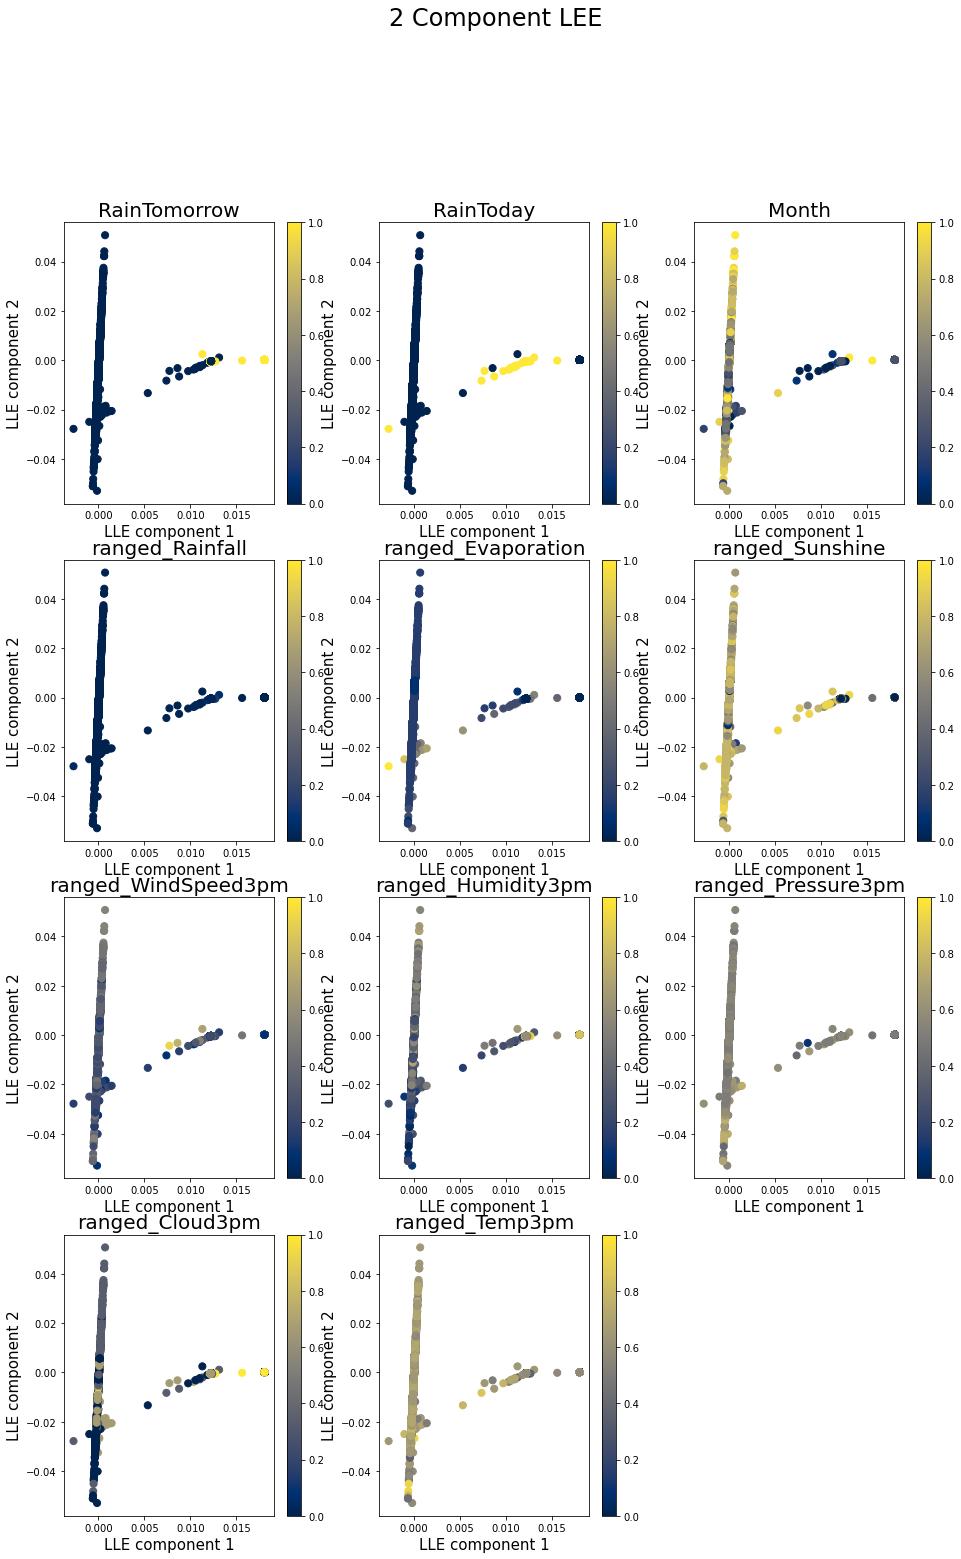

In [55]:
plot_result(lle_final_df, "LLE component 1", "LLE component 2", target_attributes, "2 Component LEE", size_y=30)

#### Discussion and observation LLE data
The LLE technique seems to not lend itself well to this particular dataset. Most of the data is spread across two narrow lines on the **LLE components**, although the lines are not parallel to the component axis.

The earlier observed seasonality in the *PCA* graph seems to be harder to find in this representation. Furthermore, the seasonality indicator attribute, the **Month**, seems to fall completely off the target attribute of this dataset **RainTomorrow**.

Other attributes also seem to not overlap, or group, well with the target attribute **RainTomorrow** using *LLE*.

The following attributes which seem to show grouping/overlapping are:
- **Ranged_Sunshine**
- **Ranged_Pressure**
- **Ranged_Temperature**

### Creation of t-SNE components

In [56]:
from sklearn.manifold import TSNE

TSNE_construct = TSNE(n_components=2)
tsne_data = TSNE_construct.fit_transform(x)

# Decision Variables
tsne_data_df = pd.DataFrame(data=tsne_data, columns=['t-sne component 1', 't-sne component 2'])
# Target Variable
target_data_df = pd.DataFrame(data=y)

#Concatenated dataframe for use
tsne_final_df = pd.concat([tsne_data_df, target_data_df], axis = 1)

#### Visualize the t-sne data

C:\Users\Marcel\iCloudDrive\Universiteit\ICT-B\Advances in Datamining\Assignment 3\utility_functions.py:100: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


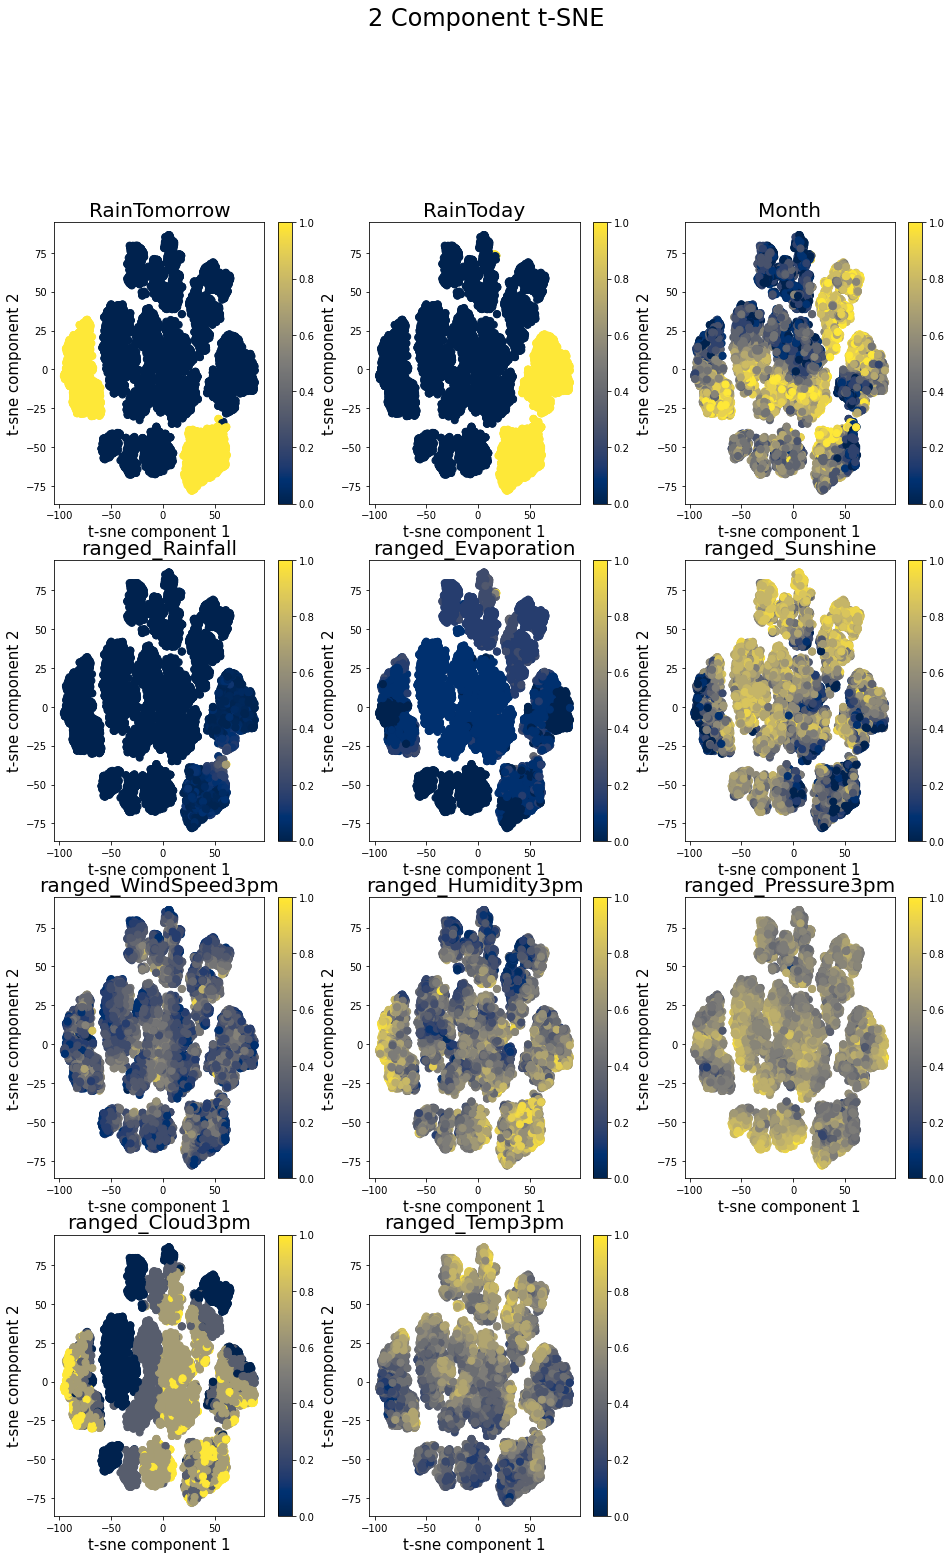

In [57]:
plot_result(tsne_final_df, "t-sne component 1", "t-sne component 2", target_attributes, "2 Component t-SNE", size_y=30)

#### Discussion and observation t-SNE data
There are several observations which can be made based on the graphs above.

Again, seasonality seems to be less observable with the *t-SNE* visualisation technique as opposed to the *PCA* technique, although an inverted pattern between **ranged_Temp3pm** and **month** could be recognized.

Something which is especially notable is that the attributes **RainToday** and **RainTomorrow** Seem to have strongly defined clusters, one of which, overlaps between the two attributes. The strong distinction could be attributed to the fact that **RainToday** and **RainTomorrow** are *binary* attributes.

However, overlapping attributes, be it with a direct or an inverted overlap, seem to be observable again. When noting the target attribute of this dataset **RainTomorrow** and the **RainToday**, several attributes seem to overlap directly or inverted:
- **Ranged_Rainfall** (direct)
- **Ranged_Sunshine** (inverted)
- **Ranged_Humidity3pm** (direct)
- **Ranged_Cloud3pm** (direct)

The attributes above might, because of their similar or inverted grouping, have (strong) influences on one and another, and especially on the target **RainTomorrow** attribute.